# PROGRAMACIÓN AVANZADA
## PROYECTO FINAL

**Nombre**: Sergio Minguez Cruces  

_________________________________________

In [1]:
import matplotlib.pyplot as plt
import json, re
import pandas as pd

__________________________________________________________________________

# PARTE I: Procesamiento y limpieza de datos en bruto

_______________________________________________________

In [2]:
#Abrimos el archivo raw_dataset.txt y creamos las expresiones regulares para asi poder seleccionar los datos que queremos del
# archivo, y utilizando un bucle recorremos las filas del archivo y anadimos las expresiones al diccionario y posteriormente 
#lo añadimos a una lista

l_dic=[]
r_fecha=r"\[(\d{4}-\d{2}-\d{2})\]"
r_PID=r"\[(A00[1234])\b"
r_precio=r"(\d{2},\d{2})€"
r_UID=r"U00[1-8]"
r_rate=r"\b[1-5]\b"
r_mensaje=r"-\s([A-Z¡].*)\]$"

with open("raw_dataset.txt","r",encoding="utf-8") as fil:

    for row in fil:

        d_producto={"Fecha":re.findall(r_fecha,row.strip())[0],
                           "ProductID":re.findall(r_PID,row.strip())[0],
                          "Precio":re.findall(r_precio,row.strip())[0].replace(",","."),
                         "UserID":re.findall(r_UID,row.strip())[0],
                         "Rate":re.findall(r_rate,row.strip())[0],
                         "Mensaje":re.findall(r_mensaje,row.strip())[0]}

                
        l_dic.append(d_producto)
    

#Creamos el archivo json y le anadimos la informacion requerida
with open("clean_dataset.json", "w",encoding="utf-8") as file:

    json.dump(l_dic,file)
    
with open("clean_dataset.json", "r") as file:
    l_dic = json.load(file)
    for producto in l_dic:
        for caracteristica in producto:
            print("{}: {}".format(caracteristica,producto[caracteristica]))

Fecha: 2023-05-15
ProductID: A002
Precio: 18.00
UserID: U005
Rate: 3
Mensaje: Producto aceptable, pero hay mejores en el mercado
Fecha: 2023-05-18
ProductID: A001
Precio: 29.99
UserID: U001
Rate: 4
Mensaje: Producto de buena calidad, cumple con las expectativas
Fecha: 2023-05-10
ProductID: A004
Precio: 53.50
UserID: U004
Rate: 4
Mensaje: Producto de buena calidad, pero el precio es un poco alto
Fecha: 2023-05-11
ProductID: A001
Precio: 30.75
UserID: U008
Rate: 4
Mensaje: Producto de calidad, pero podria ser un poco mas barato
Fecha: 2023-05-18
ProductID: A003
Precio: 46.25
UserID: U003
Rate: 5
Mensaje: La calidad es increible, vale la pena el precio
Fecha: 2023-05-10
ProductID: A002
Precio: 18.75
UserID: U006
Rate: 3
Mensaje: Producto aceptable, pero he visto mejores
Fecha: 2023-05-09
ProductID: A002
Precio: 19.50
UserID: U008
Rate: 5
Mensaje: Gran producto, excelente relacion calidad-precio
Fecha: 2023-05-04
ProductID: A001
Precio: 28.00
UserID: U006
Rate: 2
Mensaje: Decepcionado, no 

___________________________________________________________

# PARTE II: Análisis de datos con Pandas

________________________________________________________

In [3]:
#Se crea el dataframe, eliminando las filas que posean al menos un valor none o nan
df = pd.read_json("clean_dataset.json")
df=df.dropna()

#Se modifica los tipos de las columnas que quermeos, la Fecha para que sea datetime y el Rate ara que sea int32 en vez int64
df["Fecha"]= pd.to_datetime(df["Fecha"])
df["Rate"]= df["Rate"].astype(int)
df["Precio"]= df["Precio"].astype(float)
df.dtypes

Fecha        datetime64[ns]
ProductID            object
Precio              float64
UserID               object
Rate                  int32
Mensaje              object
dtype: object

1. ¿Cuál es el precio medio general (de todas las compras realizadas)?

In [4]:
round(df["Precio"].mean(),2)

35.54

2. ¿Cuál es el precio medio del producto A001?

In [5]:
round(df[df["ProductID"]=="A001"]["Precio"].mean(),2)

29.89

3. ¿Cuál es el precio medio de cada producto?

In [6]:
precio_medio=df.groupby("ProductID")["Precio"].mean()
round(precio_medio,2)

ProductID
A001    29.89
A002    19.48
A003    45.03
A004    53.45
Name: Precio, dtype: float64

¿Cuál es el producto con el precio más
alto? 

In [7]:
mayor_p=precio_medio.sort_values(ascending=False).head(1)
round(mayor_p,2)

ProductID
A004    53.45
Name: Precio, dtype: float64

¿Y más bajo?

In [8]:
menor_p=precio_medio.sort_values().head(1)
round(menor_p,2)

ProductID
A002    19.48
Name: Precio, dtype: float64

4. ¿Cuántas reviews hay en total en el dataset?

In [9]:
df.shape[0]

86

5. ¿Cuál es el promedio de calificaciones (rate) de todas las opiniones?

In [10]:
round(df["Rate"].mean(),2)

3.88

6. ¿Cuál es el promedio de calificaciones (rate) para cada producto?

In [11]:
Rate_medio=df.groupby("ProductID")["Rate"].mean()
round(Rate_medio,2)

ProductID
A001    4.04
A002    3.96
A003    4.13
A004    3.19
Name: Rate, dtype: float64

 ¿Cuál es el producto mejor puntuado? 

In [12]:
mayor_r=Rate_medio.sort_values(ascending=False).head(1)
round(mayor_r,2)

ProductID
A003    4.13
Name: Rate, dtype: float64

¿Y peor?

In [13]:
menor_r=Rate_medio.sort_values().head(1)
round(menor_r,2)

ProductID
A004    3.19
Name: Rate, dtype: float64

7. ¿Cuántas opiniones tiene cada usuario en el conjunto de datos?

In [16]:
op_u= df.groupby("UserID").count()["Rate"].sort_values()
op_u

UserID
U003     9
U004    10
U008    10
U002    11
U005    11
U006    11
U001    12
U007    12
Name: Rate, dtype: int64

8. ¿Cuánto dinero se ha gastado cada cliente? 

In [17]:
pre_u=df.groupby("UserID")["Precio"].sum()
round(pre_u,2)

UserID
U001    438.68
U002    414.40
U003    354.39
U004    342.19
U005    385.74
U006    386.00
U007    427.50
U008    307.73
Name: Precio, dtype: float64

¿Quién se ha gastado más dinero?

In [18]:
round(pre_u.sort_values().tail(1),2)

UserID
U001    438.68
Name: Precio, dtype: float64

____________________________________________________________________

# PARTE III: Generación de gráficos con Matplotlib

_____________________________________________________________

Comparación de precios: Genera un gráfico de barras que muestre el precio medio de
cada producto. Este gráfico permitirá comparar fácilmente los precios medios entre
diferentes productos y obtener una visión general de la variabilidad de los precios en
el conjunto de datos

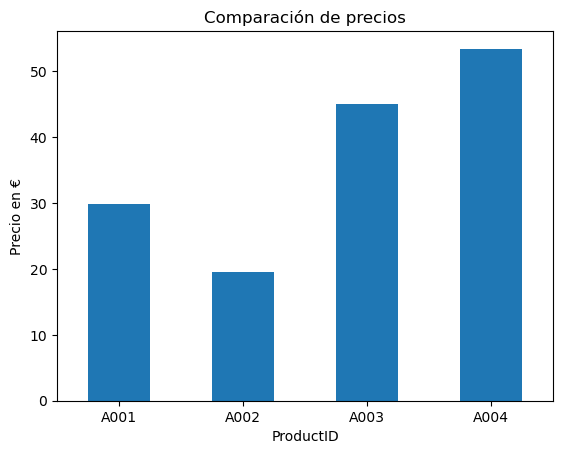

In [21]:
#Como ya habiamos agrupado el data frame por ProductoID, seleccionando la columna de precios y haciendos la media:
precio_medio

#Hacemos el grafico de barras:
precio_medio.plot(kind="bar", title="Comparación de precios",ylabel="Precio en €")
plt.xticks(rotation=0)
plt.show()

Evolución del precio: Crea un gráfico de líneas que muestre la evolución del precio de
cada producto a lo largo del tiempo. Este gráfico ayudará a identificar tendencias y
cambios en los precios de los productos y permitirá analizar el comportamiento de los
precios en diferentes momentos. NOTA: En caso de que no se hubiera hecho antes, es
necesario haber ordenado previamente el Dataframe por fechas antes de extraer los
datos para las gráficas

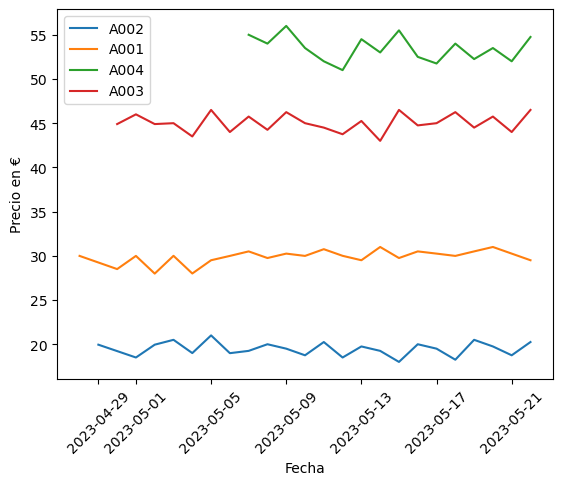

In [24]:
#Primero seleccionamos todos los valores de la column ProductID y los filtramos para que no salgan repetidos:
l_productos= df["ProductID"].unique()

#Ordenamos el data frame por fechas:
df_fecha_ordenado=df.sort_values("Fecha")

#Hacemos un bucle que vaya haciendo un plot para cada ProductID, para luego mostrarlo todos en uno:
for x in l_productos:
    dfe=df_fecha_ordenado[df_fecha_ordenado["ProductID"]== x][["Precio","Fecha"]]
    plt.plot(dfe["Fecha"],dfe["Precio"], label= x) 
plt.title="Comparación de precios"
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Precio en €")
plt.legend()
    
plt.show()

Evolución de la puntuación del usuario U001 para el producto A003: El usuario U001
ha comprado el producto A003 en cuatro ocasiones. Genera un gráfico de líneas que
muestre la evolución de la puntuación (Rate) otorgada por el usuario U001 al producto
A003 a lo largo del tiempo.

In [26]:
#Filtramos el dataframe para tener uno nuevo en el que se nos muestre el Rate, la Fecha de todas las filas cuyo UserID sea
#U001y su ProductID sea el A003
df_r_A3=df_fecha_ordenado[(df_fecha_ordenado["UserID"]== "U001")&(df_fecha_ordenado["ProductID"]== "A003")][["Rate","Fecha"]]
df_r_A3

,Rate,Fecha
16,4,2023-05-01
40,5,2023-05-10
18,3,2023-05-16
84,4,2023-05-20


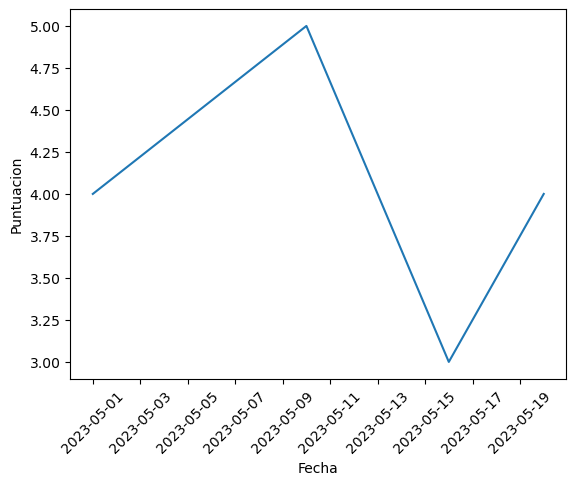

In [27]:
#Hacemos la grafica 
plt.plot(df_r_A3["Fecha"],df_r_A3["Rate"], label= x) 
plt.title="Comparación de precios"
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Puntuacion")

plt.show()